In [29]:
import pandas as pd
from sklearn.datasets import make_regression
import sklearn


In [9]:
x,y = make_regression(n_samples = 1000,n_features=100,n_informative=20,noise=0.2,random_state=1)

In [19]:
df = pd.DataFrame(x)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.107138,-0.080776,0.279412,-0.015660,0.726738,0.268385,0.849275,0.712615,-0.044770,0.805670,...,-1.205425,-1.232263,1.243376,-1.011874,0.082982,0.478736,-2.086459,0.194154,-0.110107,0.509848
1,-0.876495,-0.507616,-0.116144,-0.723581,0.292018,-0.936532,-0.949097,-0.239285,-0.534103,0.636294,...,0.678515,-2.180228,0.627632,-0.789187,-1.068121,-1.303079,-1.721232,-0.391589,0.549935,-0.116882
2,-1.489039,0.123853,-0.651070,-0.895407,1.118128,1.250891,0.340507,-0.336468,-2.090451,-0.106892,...,0.880723,0.298243,-0.272016,-1.280731,0.485603,-0.649342,-3.294858,0.554872,-1.033062,0.090840
3,-1.379671,1.212882,0.713705,-0.460171,-2.607542,0.418848,0.670165,-0.856025,0.289908,0.049161,...,0.305186,-0.805188,0.077418,-0.166475,1.685927,1.623088,-0.394004,-0.842670,0.702101,0.104404
4,-1.201559,0.635747,0.116082,-1.800881,2.174158,-0.979138,-1.689311,-0.879204,0.140742,2.217983,...,-0.846772,0.150587,1.284498,-1.563939,-0.896316,0.690359,1.188731,1.935135,-1.143291,1.794341


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

In [41]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

using correlation feature selection

In [48]:
fs =SelectKBest(score_func=f_regression,k="all")

fitting the data, so as to calculate the correlation between them

In [49]:
fs.fit(X_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x0000018081296B80>)

In [50]:
X_train_fs=fs.transform(X_train)

In [51]:
x_test_fs = fs.transform(X_test)

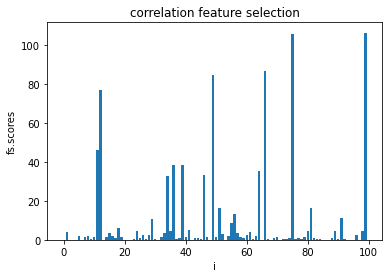

In [60]:
#for i in range(len(fs.scores_)):
#print("feature %d:%f"%(i,fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.xlabel("i")
plt.ylabel("fs.scores")
plt.title("correlation feature selection")
plt.show()
    

baseline mae

In [61]:
y_train_mean = y_train.mean()

In [62]:
y_base = [y_train_mean]*len(y_train)

In [63]:
baseline_mae = mean_absolute_error(y_base,y_train)

In [64]:
baseline_mae

217.04821984814518

In [66]:
model = LinearRegression()

In [67]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test,y_pred)

In [68]:
test_mae

0.17369358602250964